<a href="https://colab.research.google.com/github/jaan1729/Temperature-Prediction/blob/master/TemperaturePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

--2020-02-09 14:14:53--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.38.222
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.38.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip.1’

jena_climate_2009_2 100%[===================>]  12.94M  33.5MB/s    in 0.4s    

2020-02-09 14:14:53 (33.5 MB/s) - ‘jena_climate_2009_2016.csv.zip.1’ saved [13568290/13568290]



In [0]:
import zipfile
zip = zipfile.ZipFile(r'jena_climate_2009_2016.csv.zip')
zip.extractall(r'jenaClimate')

In [0]:
import os
fname = os.path.join('jenaClimate', 'jena_climate_2009_2016.csv')

In [0]:
import pandas as pd
data = pd.read_csv('jenaClimate/jena_climate_2009_2016.csv')
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


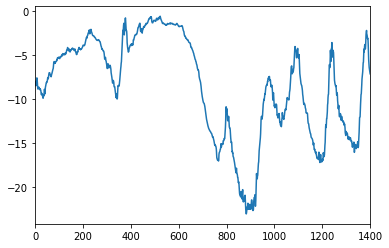

In [0]:
data.loc[:1400,'T (degC)'].plot()

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
dateTime = pd.to_datetime(data['Date Time'])
dateTime.head()

0   2009-01-01 00:10:00
1   2009-01-01 00:20:00
2   2009-01-01 00:30:00
3   2009-01-01 00:40:00
4   2009-01-01 00:50:00
Name: Date Time, dtype: datetime64[ns]

In [0]:
data['Date Time'] = dateTime

In [0]:
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [0]:
data.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420546,2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,2016-12-31 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,2017-01-01 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [0]:
data.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [0]:
data.set_index(['Date Time'], inplace = True)

In [0]:
%matplotlib inline

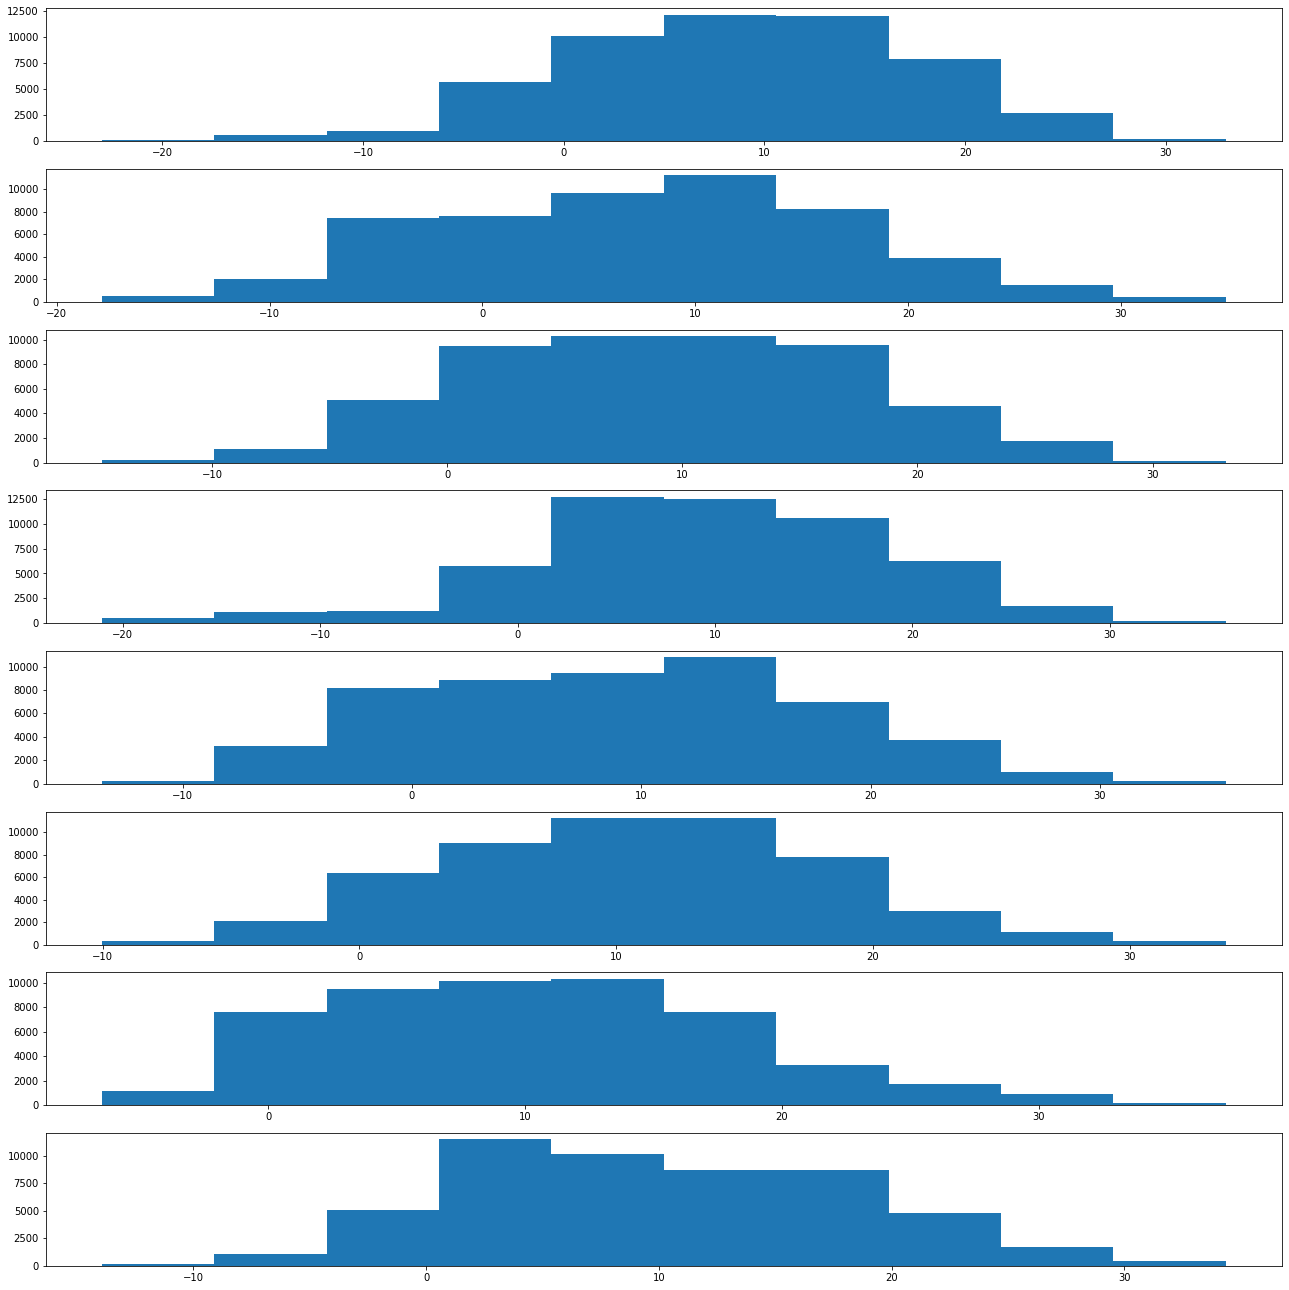

In [0]:
from matplotlib import pyplot as plt
import numpy as np
years = np.array(range(2009,2017))
fig, ax = plt.subplots(nrows = len(years), ncols = 1, figsize = (18,18))
for i in range(len(years)):
  plt.subplot(len(years),1,i+1)
  plt.hist(data[str(years[i])]['T (degC)'])
fig.tight_layout()
fig.show()

In [0]:
data = data['T (degC)']

In [0]:
data.head()

Date Time
2009-01-01 00:10:00   -8.02
2009-01-01 00:20:00   -8.41
2009-01-01 00:30:00   -8.51
2009-01-01 00:40:00   -8.31
2009-01-01 00:50:00   -8.27
Name: T (degC), dtype: float64

In [0]:
data = data.resample('D').max()

In [0]:
data.head()

Date Time
2009-01-01    -4.17
2009-01-02    -2.50
2009-01-03    12.17
2009-01-04    13.38
2009-01-05    17.42
Freq: D, Name: T (degC), dtype: float64

In [0]:
data.isnull().sum()

2

In [0]:
data.median()

14.07

In [0]:
data.fillna(data.median(), inplace = True)

In [0]:
data.loc[data == data.median]

Series([], Freq: D, Name: T (degC), dtype: float64)

In [0]:
data_train = data.loc[:'2015.12.31']
data_test = data.loc['2016.01.01':]

In [0]:
from sklearn.preprocessing import minmax_scale
x_train = []
y_train = []
x_test = []
y_test = []
for i in range(7,len(data_train)-7):
  x_train.append(data_train[i-7:i])
  y_train.append(data_train[i:i+7])
for i in range(7,len(data_test)-7):
  x_test.append(data_test[i-7:i])
  y_test.append(data_test[i:i+7])

In [0]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(x_train[:9], y_train[:2])

[[-4.17 -2.5  12.17 13.38 17.42 20.21 25.74]
 [-2.5  12.17 13.38 17.42 20.21 25.74 26.57]
 [12.17 13.38 17.42 20.21 25.74 26.57 30.11]
 [13.38 17.42 20.21 25.74 26.57 30.11 16.69]
 [17.42 20.21 25.74 26.57 30.11 16.69  9.62]
 [20.21 25.74 26.57 30.11 16.69  9.62  5.1 ]
 [25.74 26.57 30.11 16.69  9.62  5.1   4.9 ]
 [26.57 30.11 16.69  9.62  5.1   4.9   0.43]
 [30.11 16.69  9.62  5.1   4.9   0.43  4.52]] [[26.57 30.11 16.69  9.62  5.1   4.9   0.43]
 [30.11 16.69  9.62  5.1   4.9   0.43  4.52]]


In [0]:
x_train.shape

(2542, 7)

In [0]:
from sklearn.preprocessing import MinMaxScaler
x_scale = MinMaxScaler()
y_scale = MinMaxScaler()
x_train = x_scale.fit_transform(x_train)
x_test = x_scale.transform(x_test)
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)

In [0]:
x_train[:5]

array([[0.21062655, 0.24243001, 0.52180537, 0.5448486 , 0.62178633,
        0.67491906, 0.78023234],
       [0.24243001, 0.52180537, 0.5448486 , 0.62178633, 0.67491906,
        0.78023234, 0.79603885],
       [0.52180537, 0.5448486 , 0.62178633, 0.67491906, 0.78023234,
        0.79603885, 0.86345458],
       [0.5448486 , 0.62178633, 0.67491906, 0.78023234, 0.79603885,
        0.86345458, 0.60788421],
       [0.62178633, 0.67491906, 0.78023234, 0.79603885, 0.86345458,
        0.60788421, 0.47324319]])

In [0]:
%tensorflow_version 2.x
from tensorflow.keras.layers import LSTM, Flatten, Dense
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(LSTM(32, input_shape = (7, 1), return_sequences = True, activation = 'relu'))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(7))

TensorFlow 2.x selected.


In [0]:
model.compile(optimizer = 'RMSprop', loss = 'mae')

In [0]:
x_train.shape, x_test.shape

((2542, 7), (353, 7))

In [0]:
x_train = x_train.reshape(2542,7,1)
x_test = x_test.reshape(353,7,1)

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 32)             4352      
_________________________________________________________________
flatten (Flatten)            (None, 224)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                7200      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 231       
Total params: 11,783
Trainable params: 11,783
Non-trainable params: 0
_________________________________________________________________


In [0]:
pd.DataFrame(y_test).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [0]:
history = model.fit(x_train, y_train, validation_data= [x_test,y_test], epochs = 200)

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

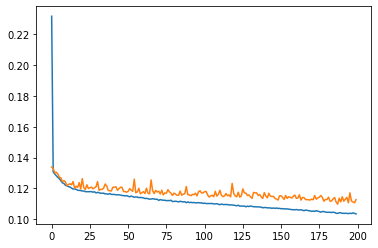

In [0]:
plt.plot(range(200), loss)
plt.plot(range(200), val_loss)
plt.show()

In [0]:
model.predict([[[5],[6],[3],[1],[0],[9],[4]]])

array([[3.3201196, 2.6314268, 4.7176156, 3.8793285, 3.5815206, 4.9730477,
        3.332256 ]], dtype=float32)